In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

In [2]:
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_dir = r"C:\Self-Learning\Kaggle\housePricePrediction\data"

train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv(os.path.join(data_dir, "test.csv"))

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


## Missing Values
Many machine learning models do not expect missing values for features. It is important to apply feature engineering to remove all the missing values form the data. Following are the ways to handle missing values:<br>
* Replace missing values with any of <b>Mean, Median or most observed value</b> for a feature
* Replace feature's missing values with <b>highly correlated</b> existing or new variable 
* Train a model to predict a missing value for a feature <b>(Advanced - Not covered here)</b>

In [8]:
null_columns_train = train.columns[train.isnull().any()]
train[null_columns_train].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
# check for null values in test data
null_columns_test = test.columns[test.isnull().any()]
test[null_columns_test].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [10]:
test_null_columns_missing_train = [i for i in null_columns_test if i not in null_columns_train]
train_null_columns_missing_test = [i for i in null_columns_train if i not in null_columns_test]  

The missing values' columns can be split into 2 Groups :<br>
<b>More than 90%</b> values missing<br>
&emsp;LotFrontage<br>
&emsp;Alley<br>
&emsp;FireplaceQu<br>
&emsp;PoolQC<br>
&emsp;Fence<br>
&emsp;MiscFeature<br>
<b>Few </b> values missing
&emsp;MasVnrType<br>
&emsp;MasVnrArea<br>
&emsp;BsmtQual<br>
&emsp;BsmtCond... so on

In [11]:
def get_null_count(df, featureName):
    print("Null values count for {} : ".format(featureName), df[featureName].isnull().sum())

### MasVnrType & MasVnrArea

In [12]:
get_null_count(train, "MasVnrType")
get_null_count(train, "MasVnrArea")

Null values count for MasVnrType :  8
Null values count for MasVnrArea :  8


In [13]:
train[["MasVnrType", "MasVnrArea"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
MasVnrType    1452 non-null object
MasVnrArea    1452 non-null float64
dtypes: float64(1), object(1)
memory usage: 22.9+ KB


In [14]:
train["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
train['MasVnrType'] = train["MasVnrType"].fillna('None')
train["MasVnrArea"] = train["MasVnrArea"].fillna(0.0)

### LotFrontage

In [16]:
get_null_count(train, "LotFrontage")

Null values count for LotFrontage :  259


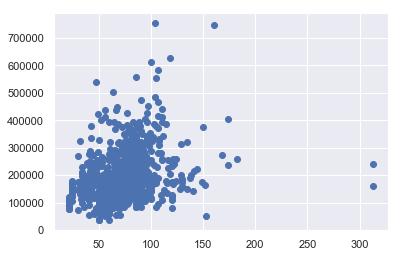

In [17]:
plt.scatter(train["LotFrontage"], train["SalePrice"])

In [18]:
corrLotFrontage = train.corr()["LotFrontage"]

In [19]:
corrLotFrontage[np.argsort(corrLotFrontage, axis=0)[::-1]]

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.192411
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

<b>LotArea</b> = LotFrontage + LotDepth<br>
<b>LotArea</b> = LotFrontage + LotFrontage<br>
<b>LotArea</b> = (LotFrontage)^2<br>
LotFrontage = Sqrt(<b>LotArea</b>)<br>
<br>
Define new feature <b>SqrtLotArea</b> which is <b>Sqrt(LotArea)</b>




In [20]:
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
train['SqrtLotArea'].corr(train['LotFrontage'])

0.6020022167939363

Since the correlation of SqrtLotArea and LotFrontage is <b>0.602</b> which is highest of all other features. We can use feature's value to replace null values in <b>LotFrontage</b>

In [21]:
filterCells = train['LotFrontage'].isnull()
train.LotFrontage[filterCells] = train.SqrtLotArea[filterCells]

In [22]:
get_null_count(train, 'LotFrontage')

Null values count for LotFrontage :  0


### MiscFeature

In [23]:
train["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [24]:
get_null_count(train, 'MiscFeature')

Null values count for MiscFeature :  1406


In [25]:
train["MiscFeature"] = train["MiscFeature"].fillna("None")

In [26]:
train["MiscFeature"].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [27]:
get_null_count(train, 'MiscFeature')

Null values count for MiscFeature :  0


### Fence

In [30]:
get_null_count(train, 'Fence')

Null values count for Fence :  1179


In [33]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [34]:
train['Fence'] = train['Fence'].fillna('None')

In [35]:
get_null_count(train, 'Fence')

Null values count for Fence :  0


### PoolQC

In [36]:
train['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [37]:
train['PoolQC'] = train['PoolQC'].fillna('None')

In [38]:
train['PoolQC'].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

### Electrical

In [40]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [41]:
get_null_count(train, 'Electrical')

Null values count for Electrical :  1


Since null count for '<b>Electrical</b>' is 1. We can replace it with the mode of the feature i.e. <b>SBrkr</b>

In [42]:
train['Electrical'] = train['Electrical'].fillna('SBrkr')

In [43]:
get_null_count(train, 'Electrical')
train['Electrical'].value_counts()

Null values count for Electrical :  0


SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Alley

In [45]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [46]:
get_null_count(train, 'Alley')

Null values count for Alley :  1369


In [47]:
train['Alley'] = train['Alley'].fillna('None')

In [48]:
get_null_count(train, 'Alley')
train['Alley'].value_counts()

Null values count for Alley :  0


None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

### FireplaceQu

In [49]:
get_null_count(train, 'FireplaceQu')
train['FireplaceQu'].value_counts()

Null values count for FireplaceQu :  690


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [50]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [51]:
get_null_count(train, 'FireplaceQu')
train['FireplaceQu'].value_counts()

Null values count for FireplaceQu :  0


None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

### Basement Features

In [56]:
bsmtColumns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1','BsmtFinSF2']


In [58]:
print(len(train[bsmtColumns][train['BsmtQual'].isnull()==True]))
train[bsmtColumns][train['BsmtQual'].isnull()==True]

37


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [59]:
for col in bsmtColumns:
    if col not in ['BsmtFinSF1','BsmtFinSF2']:
        train[col] = train[col].fillna('None')

In [60]:
print(len(train[bsmtColumns][train['BsmtQual'].isnull()==True]))
train[bsmtColumns][train['BsmtQual'].isnull()==True].head()

0


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2


### Features related to Garage 

In [61]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
train[garage_cols][train['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [62]:
for col in garage_cols:
    if train[col].dtype == np.object:
        train[col] = train[col].fillna('None')
    else:
        train[col] = train[col].fillna(0)

In [63]:
train[garage_cols][train['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea


All the null values in the training data has been transformed. The Data has been cleaned for futher <b>feature engineering</b> and <b>Model Training</b>. 

In [64]:
null_columns_train = train.columns[train.isnull().any()]
train[null_columns_train].isnull().sum()

Series([], dtype: float64)

<b>Note</b>: No Null values found in Training Data

In [65]:
train.to_csv(os.path.join(data_dir, 'train_cleaned.csv'))

## Get Important Features

In [66]:
corrSalePrice = train.corr()['SalePrice']

In [77]:
corrSalePrice[np.argsort(corrSalePrice, axis=0)[::-1]][abs(corrSalePrice) >= 0.5][1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [78]:
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
                      'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

In [81]:
train[important_features].to_csv(os.path.join(data_dir, 'train_cleaned_imp_feat.csv'))

## Further Important Feature Engineering Steps
* Convert Categorical features to Numerical features (<b>One-Hot Encoding</b>)
* Replace outliers in important features <br> 
(Either <b>LogTransform</b> the feature for normalization or remore the extended tail by replacing higher values with <b>99.5th percentile</b>)
* Dimension Reduction for highly correlated features
* Feature Scaling 

In [97]:
## Get List of all Categorical features
categorical_features = list(train.columns[train.dtypes == np.object])

## MSSubClass is numeric values but those values represent discrete categories
categorical_features.append("MSSubClass")

In [91]:
from sklearn.preprocessing import LabelEncoder

In [98]:
for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

In [102]:
train[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,3,1,1,3,3,0,4,0,5,2,...,2,5,5,2,3,4,1,8,4,9
1,3,1,1,3,3,0,2,0,24,1,...,2,5,5,2,3,4,1,8,4,4
2,3,1,1,0,3,0,4,0,5,2,...,2,5,5,2,3,4,1,8,4,9
3,3,1,1,0,3,0,0,0,6,2,...,3,5,5,2,3,4,1,8,0,10
4,3,1,1,0,3,0,2,0,15,2,...,2,5,5,2,3,4,1,8,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,1,3,3,0,4,0,8,2,...,2,5,5,2,3,4,1,8,4,9
1456,3,1,1,3,3,0,4,0,14,2,...,3,5,5,2,3,2,1,8,4,4
1457,3,1,1,3,3,0,4,0,6,2,...,2,5,5,2,3,0,3,8,4,10
1458,3,1,1,3,3,0,4,0,12,2,...,3,5,5,2,3,4,1,8,4,4


In [103]:
train.to_csv(os.path.join(data_dir, 'train_clean_encoded.csv'))
train[important_features].to_csv(os.path.join(data_dir, 'train_imp_features_clean_encoded.csv'))

### One Hot Encoding
As in many features LabelEncoding introduces numeric value for categoires where sequence/order is not important, We will introduce <b>One-Hot Encoding</b> for those features

In [106]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in categorical_features if train[cname].nunique() < 10]


In [108]:
low_cardinality_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [110]:
train['Electrical'].value_counts()

4    1335
0      94
1      27
2       3
3       1
Name: Electrical, dtype: int64

In [107]:
def encode(df, featureName):
    df_new = df.copy()
    dummies = pd.get_dummies(df[featureName], prefix=featureName, drop_first=True)
    df_new = pd.concat([df_new, dummies], axis=1)
    return df_new

In [119]:
for featureName in low_cardinality_cols:
    train = encode(train, featureName)

In [123]:
## Drop old Categorical features
train = train.drop(low_cardinality_cols, axis=1)

In [127]:
train.to_csv(os.path.join(data_dir, 'train_one_hot_encoded.csv'))

### Visualizing Target Variable

Text(3.924999999999997, 0.5, '#Occurence')

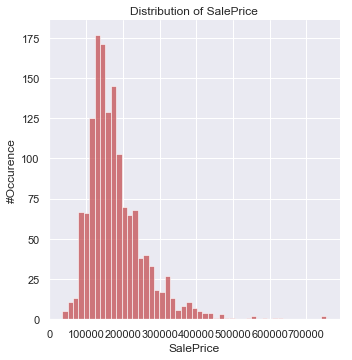

In [129]:
sns.displot(train['SalePrice'], color='r', kde=False)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('#Occurence')

Text(3.799999999999997, 0.5, '#Occurence')

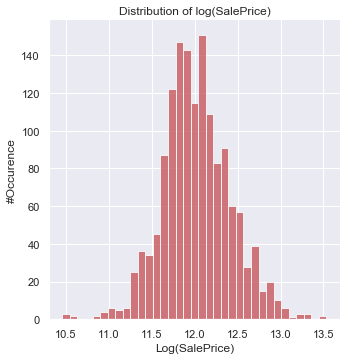

In [130]:
sns.displot(np.log(train['SalePrice']), color='r', kde=False)
plt.title('Distribution of log(SalePrice)')
plt.xlabel('Log(SalePrice)')
plt.ylabel('#Occurence')

<b>Log Transformation</b> normalizes the target variable decently. But if before training you are log transforming the target variable then remeber to convert those values back to Inverse of log before submitting

In [131]:
train['SalePrice'] = np.log(train['SalePrice'])

In [132]:
train.to_csv(os.path.join(data_dir, 'train_encoded_log_transform.csv'))

### Scaling of features

In [135]:
dummies_features = [col for col in train.columns if '_' in col]

In [137]:
non_dummies_features = [col for col in train.columns if col not in dummies_features]

In [145]:
from sklearn.preprocessing import StandardScaler
train_copy = train[non_dummies_features].copy()
sc = StandardScaler()
train_copy = sc.fit_transform(train_copy)
train_copy = pd.DataFrame(train_copy, columns=non_dummies_features)
# non_dummies_features

In [147]:
train_copy = train_copy.drop('Id', axis=1)

In [149]:
train_scaled = pd.concat([train_copy, train[dummies_features]], axis=1)

In [151]:
train_scaled.to_csv(os.path.join(data_dir, 'train_encoded_log_transform_scaled.csv'))